# Extreme Fill 2D Example

In [1]:
from extremefill2D.fextreme import init_sim, restart_sim
from extremefill2D.fextreme.plot import vega_plot
import vega

/home/dwheeler/anaconda/envs/extreme/lib/python3.5/site-packages/fuzzywuzzy/fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
treant = init_sim('scripts/params.json', 'data', tags=['debug'])

In [3]:
#treant = restart_sim(treant, 10)

In [4]:
out = vega_plot(treant)

In [5]:
print(out)

In [6]:
type(out) is vega.Vega

True

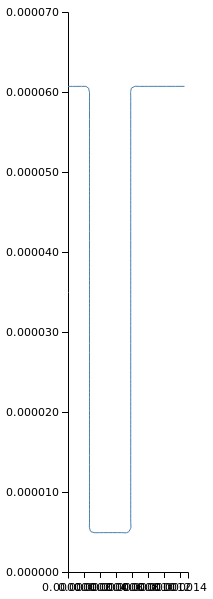

In [7]:
# NBVAL_IGNORE_OUTPUT
out